# How to load and Use a Pre-Trained Object Recognition Model
* Convolutional neural networks are now capable of outperforming humans on some computer vision tasks,such as classifying images.
* A competition-winning model for this task is the VGG model by researchers at Oxford.

## 1. ImageNet
* ImageNet is a research project to develop a large database of images with annotations e.g images and their descriptions.
* The images and their annotations have been the basis for an image classification challenge called the **ImageNet Large Scale Visual Recognition Challenge or ILSVRC**.


## 2. Load the VGG(visual geometry group) Model in Keras


In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 2382s 4us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     7385

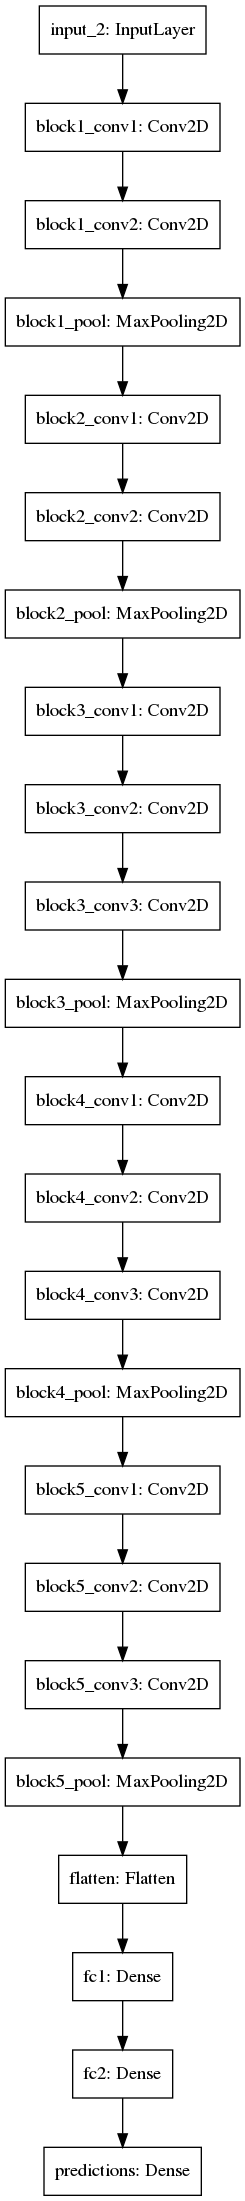

In [2]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model,to_file='vgg.png')

## 3. Developing simple photo classifier

In [3]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()

In [4]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('coffeemug.png',target_size=(224,224))

In [5]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a NumPy array
image = img_to_array(image)

In [6]:
# reshape data for the model
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))

In [7]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [9]:
# predict the probability across all output classes
yhat = model.predict(image)

In [10]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result,e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' %(label[1],label[2]*100))

40960/35363 [==================================] - 0s 5us/step
coffee_mug (75.27%)
